## Homework 3
### Part 1: Imbalanced Dataset

- In this homework, you will be working with an imbalanced Dataset. 
- The dataset is Credit Card Fraud Detection dataset which was hosted on Kaggle. 
- The aim is to detect fraudlent transactions.

### Instructions

1) Please push the .ipynb and .pdf to Github Classroom prior to the deadline, .py file is optional (not needed).<br>
2) Please include your Name and UNI below.

### Name: Adelina Yelemessova
### UNI: ay2513

### Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Feel free to import any other packages you need

### **Data Preprocessing and Exploration**.
- Download the Kaggle Credit Card Fraud data set.<br>
- Features V1, V2, … V27, V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.<br>
- Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. <br>
- The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.<br>
- Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [2]:
raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
raw_df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


### **Examining the class Imbalance**
**1.1 How many observations are in this dataset? How many are positive and negative?** <br>
(Note: Positive labels are labeled as 1)

In [3]:
# Your Code Here
total_observations = len(raw_df)
positive_observations = len(raw_df[raw_df['Class'] == 1])
negative_observations = len(raw_df[raw_df['Class'] == 0])

print(f"Total observations: {total_observations}")
print(f"Positive observations: {positive_observations}")
print(f"Negative observations: {negative_observations}")


Total observations: 284807
Positive observations: 492
Negative observations: 284315


#### **1.2 Cleaning and normalizing the data**
The raw data has a few issues. <br>
Since we are unsure what the time column actually means so drop the Time column. 
The Amount column also has a wide range of values covered so we take the log of the Amount column to reduce its range. <br>

The below is already done for you.

In [4]:
cleaned_df = raw_df.copy()

# You don't want the 'Time' column. Pop it off
cleaned_df.pop('Time')

# The 'Amount' column covers a huge range. Convert it to log-space.
eps = 0.001
cleaned_df['Log Ammount'] = np.log(cleaned_df.pop('Amount') + eps)

**1.2.1 Split the dataset into development and test sets. Set test size as 20% and random state as 42. Print the shape of your development and test features**

In [5]:
from sklearn.model_selection import train_test_split

X = cleaned_df.drop('Class', axis=1)
y = cleaned_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Development set:")
print(f"Features shape: {X_train.shape}")
print(f"Labels shape: {y_train.shape}")

print("Test set:")
print(f"Features shape: {X_test.shape}")
print(f"Labels shape: {y_test.shape}")


Development set:
Features shape: (227845, 29)
Labels shape: (227845,)
Test set:
Features shape: (56962, 29)
Labels shape: (56962,)


**1.2.2 Normalize the features using Standard Scaler from Sklearn.**

In [6]:
# Your Code Here
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### **Default Baseline**
**1.3.1 First, let us fit a default Decision tree classifier (use max_depth=10 and random_state=42). Print the AUC and Average Precision values of 5 Fold Cross Validation**

In [7]:
# Your Code Here
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, average_precision_score, make_scorer

dt_classifier = DecisionTreeClassifier(max_depth=10, random_state=42)

scorers = {
    'roc_auc': make_scorer(roc_auc_score, needs_proba=True),
    'average_precision': make_scorer(average_precision_score, needs_proba=True)
}

# cross-validation
cv_scores = {}
for metric, scorer in scorers.items():
    cv_scores[metric] = cross_val_score(dt_classifier, X_train_scaled, y_train, scoring=scorer, cv=5)

print(f"AUC (5-fold cross-validation): {cv_scores['roc_auc'].mean():.4f} +/- {cv_scores['roc_auc'].std():.4f}")
print(f"Average Precision (5-fold cross-validation): {cv_scores['average_precision'].mean():.4f} +/- {cv_scores['average_precision'].std():.4f}")


AUC (5-fold cross-validation): 0.8654 +/- 0.0295
Average Precision (5-fold cross-validation): 0.6611 +/- 0.0260


### **Random Oversampling**
**1.3.2 Perform random oversampling on the development dataset.**

*   How many positive and negative labels do you observe after random oversampling?
*   What is the shape of your development dataset?

(Note: Set random state as 42 when performing oversampling)

In [8]:
pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train_scaled, y_train)

positive_oversampled = len(y_train_oversampled[y_train_oversampled == 1])
negative_oversampled = len(y_train_oversampled[y_train_oversampled == 0])

print(f"Positive labels after random oversampling: {positive_oversampled}")
print(f"Negative labels after random oversampling: {negative_oversampled}")

print(f"Features shape after random oversampling: {X_train_oversampled.shape}")
print(f"Labels shape after random oversampling: {y_train_oversampled.shape}")


Positive labels after random oversampling: 227451
Negative labels after random oversampling: 227451
Features shape after random oversampling: (454902, 29)
Labels shape after random oversampling: (454902,)


**1.3.3 Repeat 1.3.1 using the dataset you created in the above step (1.3.2 Random oversampling). <br>(Make sure you use the same hyperparameters as 1.3.1. i.e., max_depth=10, random_state=42 and 5 Fold Cross Validation) <br>
This will help us to compare the models.**

In [10]:
dt_classifier_oversampled = DecisionTreeClassifier(max_depth=10, random_state=42)

cv_scores_oversampled = {}
for metric, scorer in scorers.items():
    cv_scores_oversampled[metric] = cross_val_score(dt_classifier_oversampled, X_train_oversampled, y_train_oversampled, scoring=scorer, cv=5)
print(f"AUC (5-fold cross-validation, oversampled): {cv_scores_oversampled['roc_auc'].mean():.4f} +/- {cv_scores_oversampled['roc_auc'].std():.4f}")
print(f"Average Precision (5-fold cross-validation, oversampled): {cv_scores_oversampled['average_precision'].mean():.4f} +/- {cv_scores_oversampled['average_precision'].std():.4f}")


AUC (5-fold cross-validation, oversampled): 0.9984 +/- 0.0001
Average Precision (5-fold cross-validation, oversampled): 0.9979 +/- 0.0001


### **Random Undersampling**
**1.3.4 Perform Random undersampling on the development dataset.**

- How many positive and negative labels do you observe after random undersampling?
- What is the shape of your development dataset?

(Note: Set random state as 42 when performing undersampling)

In [11]:
# Your Code Here
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train_scaled, y_train)

unique_labels, counts = np.unique(y_train_undersampled, return_counts=True)
label_counts = dict(zip(unique_labels, counts))

print("Label counts after random undersampling:")
print(f"Positive labels: {label_counts[1]}")
print(f"Negative labels: {label_counts[0]}")

print(f"\nShape of the undersampled development dataset: {X_train_undersampled.shape}")


Label counts after random undersampling:
Positive labels: 394
Negative labels: 394

Shape of the undersampled development dataset: (788, 29)


**1.3.5 Repeat 1.3.1 using the dataset you created in the above step(1.3.4 Random undersampling).<br>(Make sure you use the same hyperparameters as 1.3.1. i.e., max_depth=10, random_state=42 and 5 Fold Cross Validation)<br>
This will help us to compare the models**

In [12]:
# Your Code Here
dt_classifier_undersampled = DecisionTreeClassifier(max_depth=10, random_state=42)

cv_scores_undersampled = {}
for metric, scorer in scorers.items():
    cv_scores_undersampled[metric] = cross_val_score(dt_classifier_undersampled, X_train_undersampled, y_train_undersampled, scoring=scorer, cv=5)

print(f"AUC (5-fold cross-validation, undersampled): {cv_scores_undersampled['roc_auc'].mean():.4f} +/- {cv_scores_undersampled['roc_auc'].std():.4f}")
print(f"Average Precision (5-fold cross-validation, undersampled): {cv_scores_undersampled['average_precision'].mean():.4f} +/- {cv_scores_undersampled['average_precision'].std():.4f}")



AUC (5-fold cross-validation, undersampled): 0.9026 +/- 0.0286
Average Precision (5-fold cross-validation, undersampled): 0.8616 +/- 0.0370


### **SMOTE**
**1.3.6 Perform Synthetic Minority Oversampling Technique (SMOTE) on the development dataset**

- How many positive and negative labels do you observe after performing SMOTE?
- What is the shape of your development dataset?

(Note: Set random state as 42 when performing SMOTE)

In [13]:
# Your Code Here
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)
positive_labels = sum(y_train_smote == 1)
negative_labels = sum(y_train_smote == 0)

print(f"Positive labels: {positive_labels}")
print(f"Negative labels: {negative_labels}")

print(f"Shape of X_train_smote: {X_train_smote.shape}")
print(f"Shape of y_train_smote: {y_train_smote.shape}")


Positive labels: 227451
Negative labels: 227451
Shape of X_train_smote: (454902, 29)
Shape of y_train_smote: (454902,)


**1.3.7 Repeat 1.3.1 using the dataset you created in the above step(1.3.4 SMOTE).<br>(Make sure you use the same hyperparameters as 1.3.1. i.e., max_depth=10, random_state=42 and 5 Fold Cross Validation)<br>
This will help us to compare the models**

In [14]:
dt_classifier_smote = DecisionTreeClassifier(max_depth=10, random_state=42)

cv_scores_smote = {}
for metric, scorer in scorers.items():
    cv_scores_smote[metric] = cross_val_score(dt_classifier_smote, X_train_smote, y_train_smote, scoring=scorer, cv=5)

print(f"AUC (5-fold cross-validation, SMOTE): {cv_scores_smote['roc_auc'].mean():.4f} +/- {cv_scores_smote['roc_auc'].std():.4f}")
print(f"Average Precision (5-fold cross-validation, SMOTE): {cv_scores_smote['average_precision'].mean():.4f} +/- {cv_scores_smote['average_precision'].std():.4f}")


AUC (5-fold cross-validation, SMOTE): 0.9972 +/- 0.0001
Average Precision (5-fold cross-validation, SMOTE): 0.9963 +/- 0.0003


### **Balanced Weight**

**1.3.8 Train a balanced default Decision tree classifier. <br> [ use max_depth=10 and random_state=42 and balance the class weights with 5 Fold Cross Validation ] <br>
Print the AUC and average precision on dev set**

In [15]:
# Your Code Here
dt_classifier_balanced = DecisionTreeClassifier(max_depth=10, random_state=42, class_weight='balanced')
cv_scores_balanced = {}
for metric, scorer in scorers.items():
    cv_scores_balanced[metric] = cross_val_score(dt_classifier_balanced, X_train_scaled, y_train, scoring=scorer, cv=5)

print(f"AUC (5-fold cross-validation, balanced): {cv_scores_balanced['roc_auc'].mean():.4f} +/- {cv_scores_balanced['roc_auc'].std():.4f}")
print(f"Average Precision (5-fold cross-validation, balanced): {cv_scores_balanced['average_precision'].mean():.4f} +/- {cv_scores_balanced['average_precision'].std():.4f}")


AUC (5-fold cross-validation, balanced): 0.9070 +/- 0.0132
Average Precision (5-fold cross-validation, balanced): 0.6237 +/- 0.0113


### **Model Prediction & Evaluation**
**1.4.1 Make predictions on the test set using the five models that you built and report their AUC values.**<br>
(Five models include models from - Default Baseline, Random Undersampling, Random Oversampling, SMOTE & Balanced Weight)

In [20]:
# models
dt_classifier.fit(X_train_scaled, y_train)
dt_classifier_oversampled.fit(X_train_oversampled, y_train_oversampled)
dt_classifier_undersampled.fit(X_train_undersampled, y_train_undersampled)
dt_classifier_smote.fit(X_train_smote, y_train_smote)
dt_classifier_balanced.fit(X_train_scaled, y_train)

y_pred_default = dt_classifier.predict_proba(X_test_scaled)[:, 1]
y_pred_oversampled = dt_classifier_oversampled.predict_proba(X_test_scaled)[:, 1]
y_pred_undersampled = dt_classifier_undersampled.predict_proba(X_test_scaled)[:, 1]
y_pred_smote = dt_classifier_smote.predict_proba(X_test_scaled)[:, 1]
y_pred_balanced = dt_classifier_balanced.predict_proba(X_test_scaled)[:, 1]

# AUC values
auc_default = roc_auc_score(y_test, y_pred_default)
auc_oversampled = roc_auc_score(y_test, y_pred_oversampled)
auc_undersampled = roc_auc_score(y_test, y_pred_undersampled)
auc_SMOTE = roc_auc_score(y_test, y_pred_smote)
auc_balanced = roc_auc_score(y_test, y_pred_balanced)
print(f"AUC (Default Baseline): {auc_default:.4f}")
print(f"AUC (Random Undersampling): {auc_undersampled:.4f}")
print(f"AUC (Random Oversampling): {auc_oversampled:.4f}")
print(f"AUC (SMOTE): {auc_SMOTE:.4f}")
print(f"AUC (Balanced Weight): {auc_balanced:.4f}")



AUC (Default Baseline): 0.8719
AUC (Random Undersampling): 0.9051
AUC (Random Oversampling): 0.8609
AUC (SMOTE): 0.8893
AUC (Balanced Weight): 0.8433


**1.4.2 Plot Confusion Matrices for all the five models on the test set. Comment your results and share your observations of the confusion matrices in detail**<br>
(Five models include models from - Default Baseline, Random Undersampling, Random Oversampling, SMOTE & Balanced Weight)

In [21]:
pip install -U scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


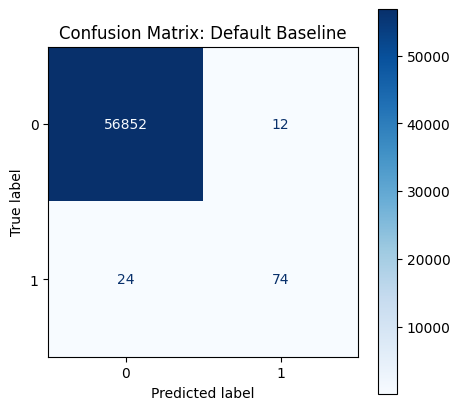

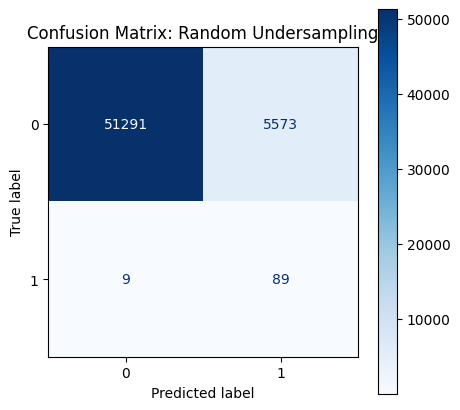

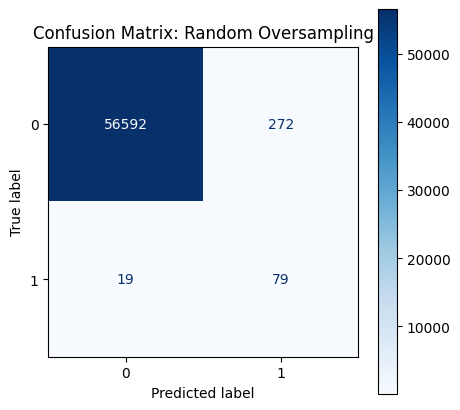

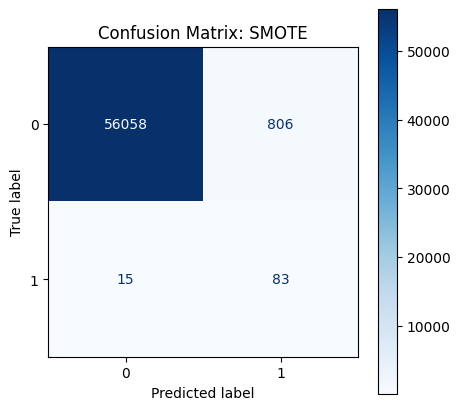

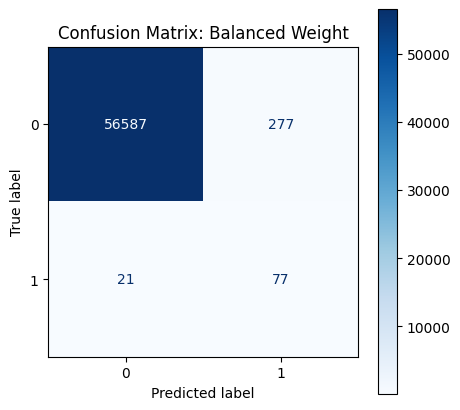

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_cm(classifier, X_test, y_test, title):
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    
    fig, ax = plt.subplots(figsize=(5, 5))
    disp.plot(ax=ax, cmap='Blues', values_format='d')
    plt.title(title)
    plt.show()

classifiers = [
    (dt_classifier, "Default Baseline"),
    (dt_classifier_undersampled, "Random Undersampling"),
    (dt_classifier_oversampled, "Random Oversampling"),
    (dt_classifier_smote, "SMOTE"),
    (dt_classifier_balanced, "Balanced Weight")
]

for clf, label in classifiers:
    plot_cm(clf, X_test_scaled, y_test, title=f"Confusion Matrix: {label}")




Default Baseline: 

- A large number of true negatives (56,852) and a small number of false positives (12) indicate good performance on the majority class.
- Identification of the minority class was difficult, with 24 false negatives and 74 true positives. 

Random Undersampling: 

- Significant increase in false positives (5,573), resulting in many instances of the majority class being misclassified. 
- Better minority class identification with 89 true positives and fewer false negatives (9), at the expense of majority class accuracy (51,291 true negatives). 


Random Oversampling: 
- Improved performance in terms of false positives (272) when compared to undersampling, but still more than the default baseline. 
- There were fewer false negatives (19) and more true positives (79), indicating an improved ability to identify the minority class. There are 56,592 true negatives. 



SMOTE: 
- Less false positives (806), but more than the default baseline. Improved balance of identifying both classes, with fewer false negatives (15) and more true positives (83). There are 56,058 true negatives.



 Balanced Weight: 
 - Similar to random oversampling, but with slightly more false positives (277) and fewer true positives (77). 
 - In terms of false positives, it outperforms random undersampling and SMOTE, but it produces more false negatives (21). There are 56,587 true negatives. 

In summary, the models that use resampling techniques and balanced weights outperform the default baseline model in identifying the minority class. These advancements, however, come at the expense of increased false positives. SMOTE appears to provide a better balance between the two classes, whereas random undersampling appears to be overly aggressive in dealing with the imbalance.

In [ ]:
#False negatives - should be low 


**1.4.3 Plot ROC for all the five models on the test set in a single plot. Make sure you label axes and legend properly. Comment on your results and share your observations in detail**<br>
(Five models include models from - Default Baseline, Random Undersampling, Random Oversampling, SMOTE & Balanced Weight)

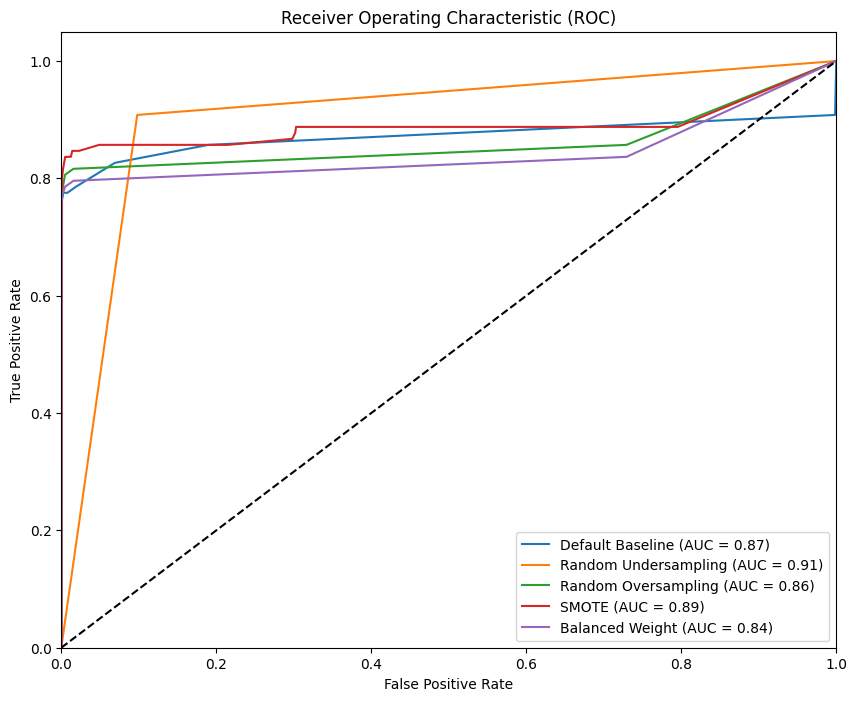

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc(classifier, X_test, y_test, label):
    y_prob = classifier.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{label} (AUC = {roc_auc:.2f})")

classifiers = [
    (dt_classifier, "Default Baseline"),
    (dt_classifier_undersampled, "Random Undersampling"),
    (dt_classifier_oversampled, "Random Oversampling"),
    (dt_classifier_smote, "SMOTE"),
    (dt_classifier_balanced, "Balanced Weight")
]

plt.figure(figsize=(10, 8))
for clf, label in classifiers:
    plot_roc(clf, X_test_scaled, y_test, label)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


The ROC plot for the five models shows distinct differences in their performances in terms of true positive rates (TPR) and false positive rates (FPR). The AUC values indicate the overall performance of each model in distinguishing between the two classes.

Default Baseline (AUC = 0.87): The blue line represents this model, which performs reasonably well but is not the best among the five models.

Random Undersampling (AUC = 0.91): The orange line represents this model, which has the highest AUC value and the best overall performance among the five models. However, it's important to note that this model might have a higher number of false positives compared to other models.

Random Oversampling (AUC = 0.86): The green line represents this model, which performs slightly worse than the default baseline and has the second-lowest AUC value among the five models.

SMOTE (AUC = 0.89): The red line represents this model, which has a better AUC value than the default baseline and random oversampling models. At a true positive rate of 0.85, SMOTE is the best model to choose as it has the lowest false positive rate compared to the other models at that TPR.

Balanced Weight (AUC = 0.84): The purple line represents this model, which has the lowest AUC value among the five models and the weakest overall performance.

Based on the ROC plot, if we need to detect at least 90% of all fraud (TPR = 0.9), the random undersampling model would be the best choice as it has the highest TPR. However, this comes with a trade-off of having more false positives compared to other models at the same TPR. Other models, such as SMOTE, have significantly higher false positives at a TPR of 0.9.

Whereasrandom undersampling model has the best overall performance in terms of AUC, it may not always be the most suitable model if a lower FPR is required. In such cases(when for example true positive rate = 0.80), other models like SMOTE might be more appropriate, as it has small false positive rates. 